<a href="https://colab.research.google.com/github/edzinic1/Artificial-Intelligence-Project/blob/histogrami/histogrami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kolone u glavnom datasetu: ['disease', 'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5', 'symptom_6', 'symptom_7', 'symptom_8', 'symptom_9', 'symptom_10', 'symptom_11', 'symptom_12', 'symptom_13', 'symptom_14', 'symptom_15', 'symptom_16', 'symptom_17']
Prvih 5 redova:
             disease   symptom_1              symptom_2              symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              symptom_4 symptom_5 symptom_6 symptom_7 symptom_8 symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN 

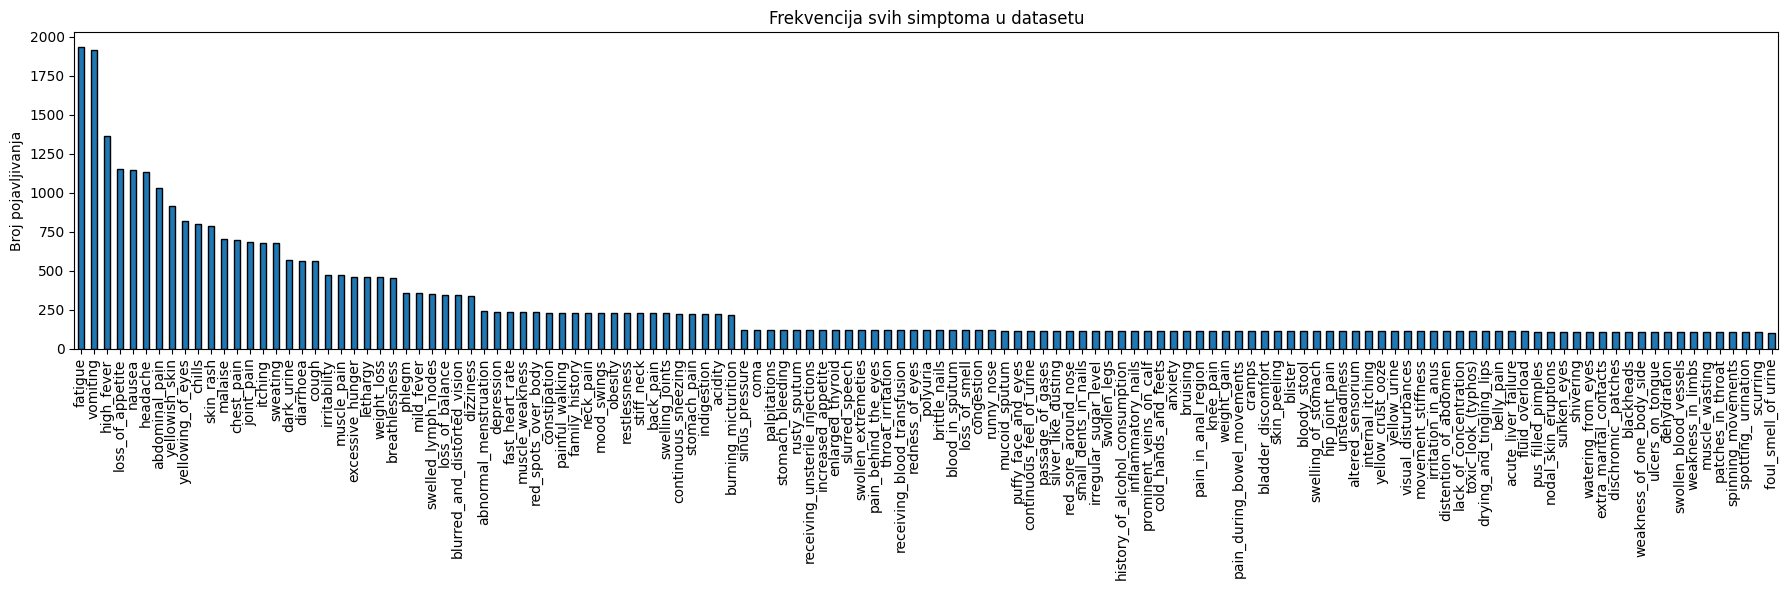

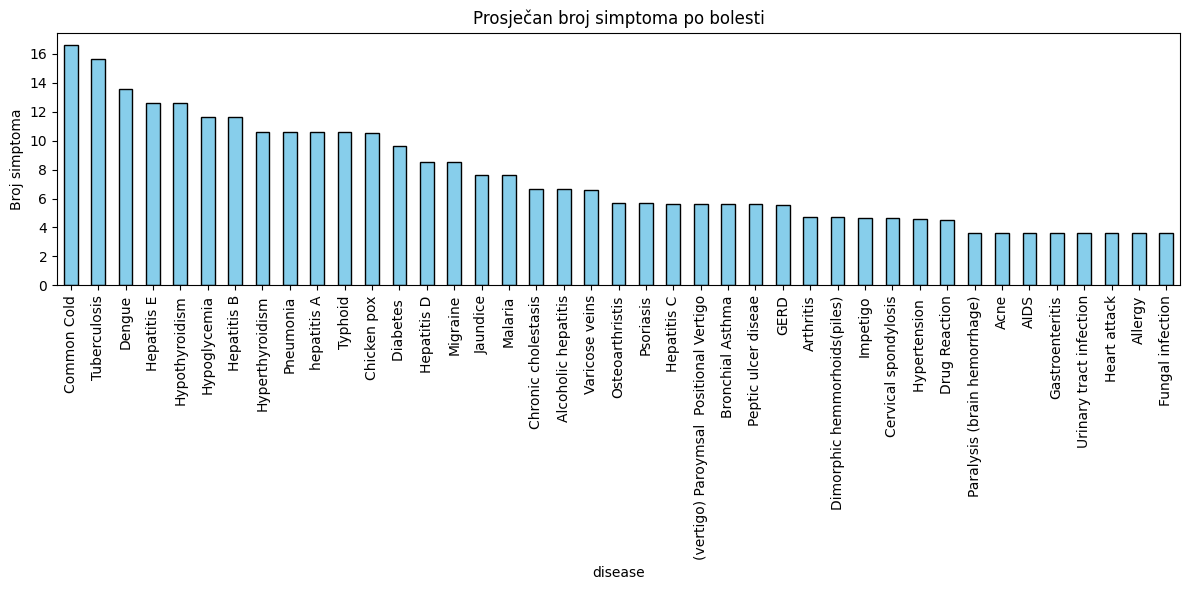

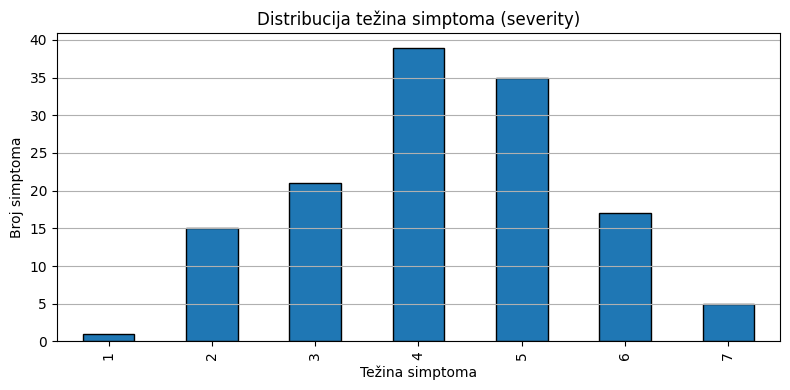

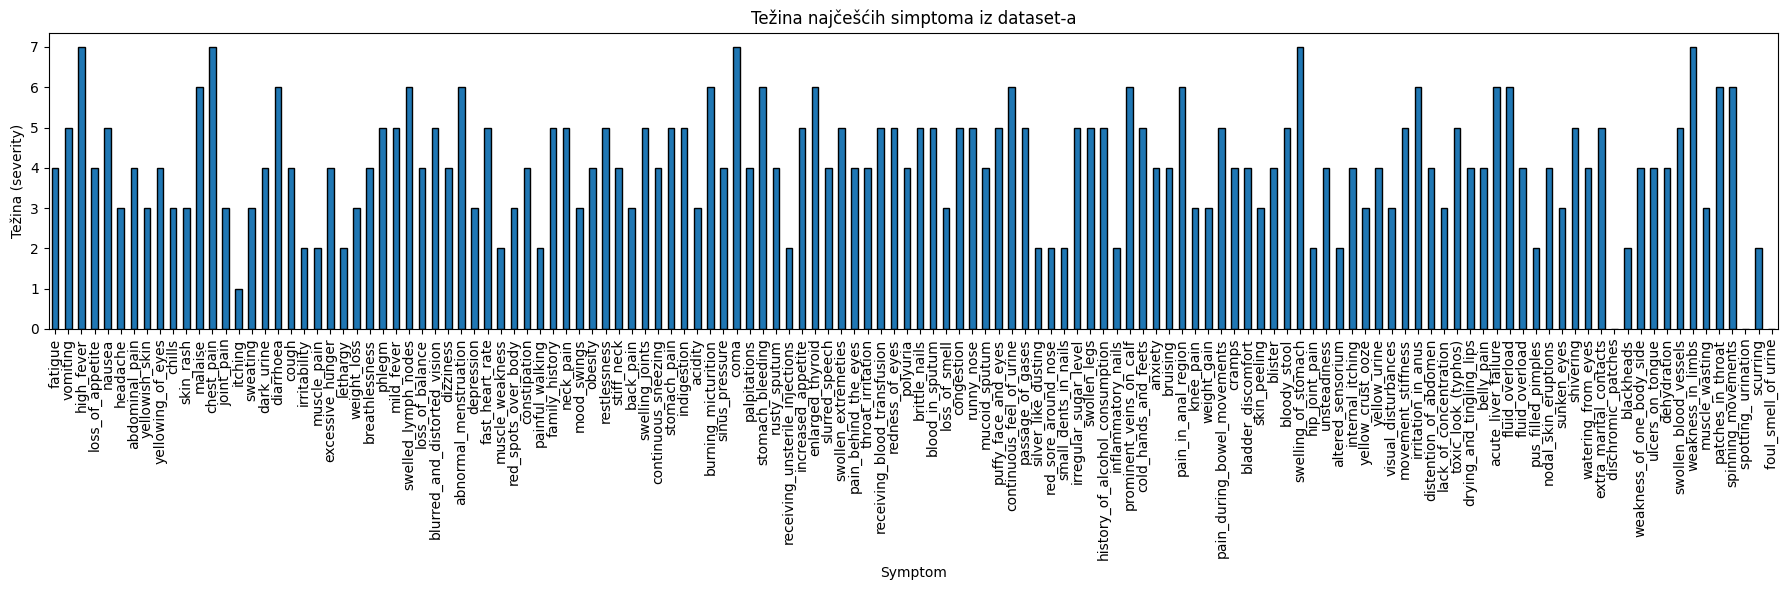

In [ ]:
# 1. Biblioteke
import pandas as pd
import matplotlib.pyplot as plt

# 2. Učitavanje CSV fajlova
df = pd.read_csv('/content/dataset (1).csv')
severity_df = pd.read_csv('/content/Symptom-severity.csv')
description_df = pd.read_csv('/content/symptom_Description.csv')
precaution_df = pd.read_csv('/content/symptom_precaution.csv')

# 3. Čišćenje kolona i vrijednosti
df.columns = df.columns.str.strip().str.lower()
severity_df.columns = severity_df.columns.str.strip()
severity_df['Symptom'] = severity_df['Symptom'].str.strip().str.lower()
description_df.columns = description_df.columns.str.strip()
description_df['Disease'] = description_df['Disease'].str.strip().str.lower()
precaution_df.columns = precaution_df.columns.str.strip()
precaution_df['Disease'] = precaution_df['Disease'].str.strip().str.lower()

# 4. Prikaz kolona i osnovne informacije
print("Kolone u glavnom datasetu:", df.columns.tolist())
print("Prvih 5 redova:\n", df.head())
print("\nBroj unikatnih bolesti:", df['disease'].nunique())

# 5. Spajanje svih simptoma u jedan niz
symptom_cols = [col for col in df.columns if col.startswith("symptom")]
all_symptoms = pd.Series(dtype=str)
for col in symptom_cols:
    all_symptoms = pd.concat([all_symptoms, df[col]])

all_symptoms = all_symptoms.dropna().astype(str).str.strip().str.lower()
print("Ukupno pronađenih simptoma (uključujući duplikate):", len(all_symptoms))

symptom_freq = all_symptoms.value_counts()

# 6. Frekvencija simptoma
if symptom_freq.empty:
    print("Nema validnih simptoma za prikaz histograma.")
else:
    plt.figure(figsize=(18, 6))
    symptom_freq.plot(kind='bar', edgecolor='black')
    plt.title("Frekvencija svih simptoma u datasetu")
    plt.ylabel("Broj pojavljivanja")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# 7. Broj simptoma po bolesti
df['broj_simptoma'] = df[symptom_cols].notna().sum(axis=1)
simptom_po_bolesti = df.groupby('disease')['broj_simptoma'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
simptom_po_bolesti.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Prosječan broj simptoma po bolesti")
plt.ylabel("Broj simptoma")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 8. Histogram težina simptoma
symptom_weight_freq = severity_df['weight'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
symptom_weight_freq.plot(kind='bar', edgecolor='black')
plt.title("Distribucija težina simptoma (severity)")
plt.xlabel("Težina simptoma")
plt.ylabel("Broj simptoma")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 9. Histogram težine najčešćih simptoma
merged = pd.merge(
    symptom_freq.rename("frekvencija").reset_index().rename(columns={'index': 'Symptom'}),
    severity_df,
    on='Symptom',
    how='left'
)

plt.figure(figsize=(18, 6))
merged.sort_values(by='frekvencija', ascending=False).set_index('Symptom')['weight'].plot(kind='bar', edgecolor='black')
plt.title("Težina najčešćih simptoma iz dataset-a")
plt.ylabel("Težina (severity)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


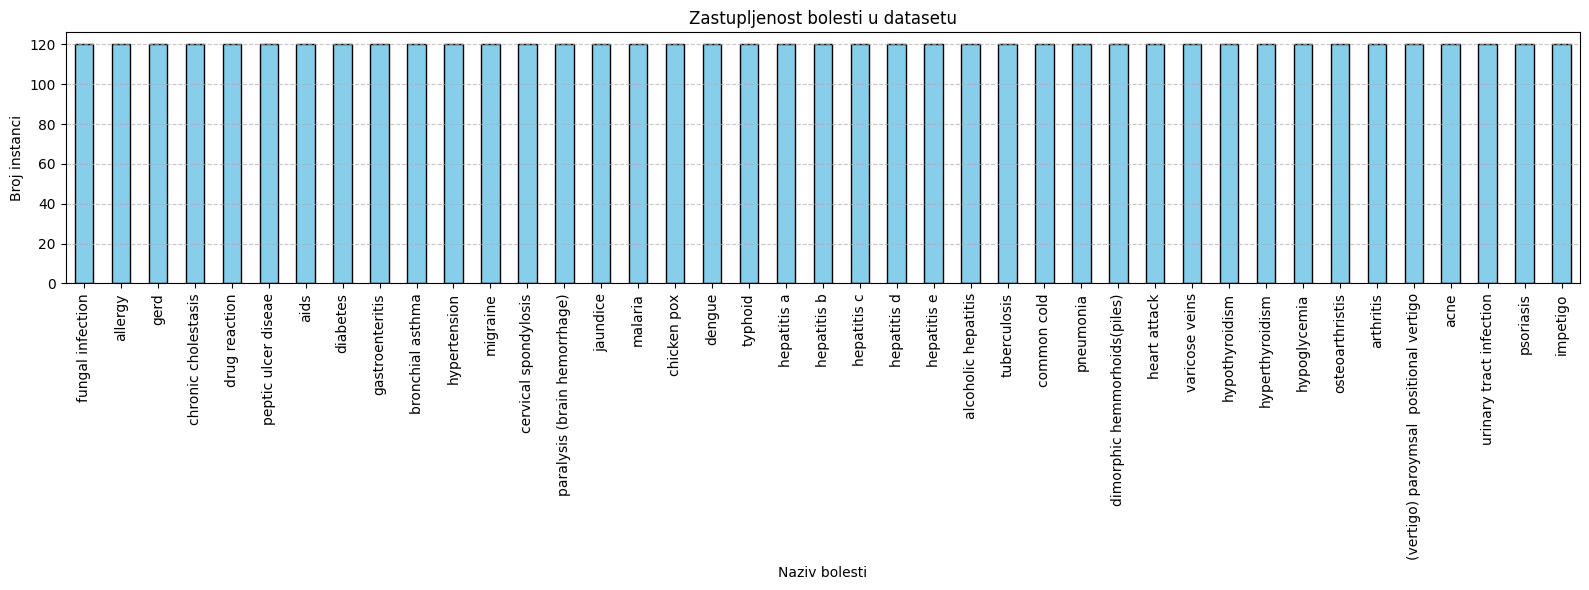

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Učitaj dataset
df = pd.read_csv("dataset (1).csv")

# Očisti naziv bolesti (ako je potrebno)
df['Disease'] = df['Disease'].str.strip().str.lower()

# Izračunaj frekvenciju svake bolesti
disease_counts = df['Disease'].value_counts()

# Prikaz histograma
plt.figure(figsize=(16, 6))
disease_counts.plot(kind='bar', edgecolor='black', color='skyblue')
plt.title("Zastupljenost bolesti u datasetu")
plt.xlabel("Naziv bolesti")
plt.ylabel("Broj instanci")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
